In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!pip install tensorboardcolab

## Load Datasets

In [0]:
X_train = np.load("xtrain_file.npy")
X_test = np.load("xtest_file.npy")
y_train = np.load("ytrain_file.npy")
y_test = np.load("ytest_file.npy")

In [0]:
# Normalize train dataset
X_train /= 255
X_test /= 255

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1800, 64, 64, 3) (200, 64, 64, 3) (1800, 10) (200, 10)


## CNN #0

In [7]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback

Using TensorFlow backend.


In [0]:
data_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
def basic_cnn():
    model = Sequential()

    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=data_shape))
    model.add(BatchNormalization())

    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())

    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(BatchNormalization())

    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.4))
    model.add(Dense(10, activation='softmax'))
    adadelta = optimizers.Adadelta()
    model.compile(loss = 'categorical_crossentropy', optimizer= adadelta, metrics=['accuracy'])

    return model

In [0]:
model0 = basic_cnn()

In [0]:
model0.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 63, 63, 32)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 63, 63, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 62, 62, 48)        6192      
_________________________________________________________________
batch_normalization_2 (Batch (None, 62, 62, 48)        192       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 61, 61, 120)       23160     
_________________________________________________________________
batch_normalization_3 (Batch (None, 61, 61, 120)       480       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 120)      

In [0]:
# tensorboard_callback = TensorBoardColab()

Wait for 8 seconds...



KeyboardInterrupt



Initialization failed, retry again (1)


Wait for 8 seconds...
TensorBoard link:
https://66c34f98.ngrok.io


In [0]:
%%time
history = model0.fit(X_train, y_train, batch_size = 50, validation_split=0.2, epochs = 100, verbose = 0)

CPU times: user 1min 12s, sys: 19.5 s, total: 1min 32s
Wall time: 1min 41s


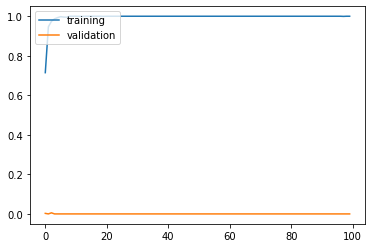

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [0]:
results = model0.evaluate(X_test, y_test)

200/200 [==============================] - 0s 462us/step


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.79


## CNN #1

In [0]:
data_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
def cnn_1():
    model = Sequential()
    
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=data_shape))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [0]:
model = cnn_1()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 57600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7372928   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
tensorboard_model = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://66c34f98.ngrok.io


In [0]:
%%time
history = model.fit(X_train, y_train, batch_size=4, epochs=10, verbose=1, validation_data=(X_test, y_test), callbacks=[TensorBoardColabCallback(tensorboard_model)])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1800 samples, validate on 200 samples







Epoch 1/10
1800/1800 [==============================] - 5s 3ms/step - loss: 1.2405 - acc: 0.5772 - val_loss: 0.3409 - val_acc: 0.9150

Epoch 2/10
1800/1800 [==============================] - 3s 2ms/step - loss: 0.4279 - acc: 0.8539 - val_loss: 0.2196 - val_acc: 0.9150
Epoch 3/10
1800/1800 [==============================] - 3s 2ms/step - loss: 0.2690 - acc: 0.9150 - val_loss: 0.1319 - val_acc: 0.9750
Epoch 4/10
1800/1800 [==============================] - 3s 2ms/step - loss: 0.1871 - acc: 0.9333 - val_loss: 0.1820 - val_acc: 0.9500
Epoch 5/10
1800/1800 [==============================] - 3s 2ms/step - loss: 0.1647 - acc: 0.9450 - val_loss: 0.1325 - val_acc: 0.9600
Epoch 6/10
1800/1800 [==============================] - 3s 2ms/step - loss: 0.1251 - acc: 0.9606 - val_loss: 0.1375 - val_acc: 0.9600
Epoch 7/10
1800/1800 [======================

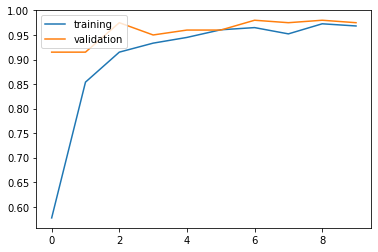

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.savefig('cnn1.png')
# plt.show()

In [0]:
results = model.evaluate(X_test, y_test)

200/200 [==============================] - 0s 314us/step


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.975


## CNN #2

In [0]:
data_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])
def cnn_2():
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=data_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    adam = optimizers.rmsprop(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [0]:
model2 = cnn_2()

In [0]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 62, 62, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 31, 31, 64)       

In [0]:
tensorboard_model2 = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
https://bd5dd90c.ngrok.io


In [0]:
%%time
history = model2.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0, validation_data=(X_test, y_test), callbacks=[TensorBoardColabCallback(tensorboard_model2)] )

CPU times: user 1min 2s, sys: 11.1 s, total: 1min 13s
Wall time: 1min 12s


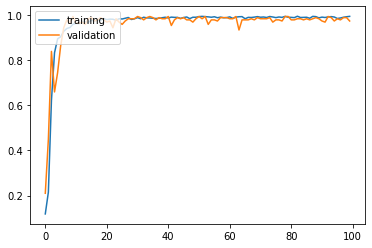

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.savefig('cnn2.png')
# plt.show()

In [0]:
results = model2.evaluate(X_test, y_test)

200/200 [==============================] - 0s 196us/step


In [0]:
print('Test accuracy: ', results[1])

Test accuracy:  0.975


## LSTM

In [0]:
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score

In [21]:
X_train1 = X_train.reshape((X_train.shape[0],X_train.shape[1], X_train.shape[2] * X_train.shape[3]))
X_test1 = X_test.reshape((X_test.shape[0],X_test.shape[1], X_test.shape[2] * X_test.shape[3]))
print(X_test1.shape)

(200, 64, 192)


In [0]:
data_shape1 = (X_train1.shape[1], X_train1.shape[2])
def lstm():
    model = Sequential()
    model.add(LSTM(50, input_shape = data_shape1, return_sequences = False))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [0]:
model = KerasClassifier(build_fn = lstm, epochs = 100, batch_size = 50, verbose = 1)

In [24]:
model.fit(X_train1, y_train,verbose=0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where










In [25]:
y_pred = model.predict(X_test1)

200/200 [==============================] - 0s 1ms/step


In [0]:
y_test_ = np.argmax(y_test, axis = 1)

In [31]:
# accuracy improves by adopting LSTM structure
print(accuracy_score(y_pred, y_test_))

0.93
